In [3]:
# Import libraries
import pandas as pd
import cufflinks as cf

import PortfolioAnalyser as pa

# Set cufflinks offline
cf.go_offline()

In [2]:
tickers = ['IWDA', 'IS3Q', 'IQQ0']

ETFs = pd.DataFrame()

# Para cada valor na variável tickers
for ticker in tickers:
    # Ler o ficheiro .csv correspondente, ler as datas e seleccionar só a coluna de preços
    ETF = pd.read_csv(ticker + '.csv', index_col='Date', parse_dates=True)[['Price']]
    # Dar o nome do ticker à coluna para depois podermos distinguir na DataFrame
    ETF.columns = [ticker]
    # Usar a função merge_time_series usando a opção outer. Quando são muitos ETFs aconselho
    # sempre a função outer para não ir "perdendo" demasiadas cotações simplesmente porque há
    # um ETF sem cotação nesse dia. Por outro lado a função dropna() força a começarem e 
    # acabarem no mesmo dia (para serem efectivamente comparáveis)
    ETFs = pa.merge_time_series(ETFs, ETF, how='outer').dropna()

# Ordenar as datas para que sejam ascendentes
ETFs = ETFs.sort_index(ascending=True)

# Fazer o growth index
ETFs_gi = pa.compute_growth_index(ETFs)
    
ETFs_gi

,IWDA,IS3Q,IQQ0
Date,,,
2014-11-10,100.00,100.00,100.00
2014-11-11,100.03,100.14,100.19
2014-11-12,99.55,99.95,99.92
2014-11-13,99.64,99.81,100.27
2014-11-14,99.58,99.76,100.04
...,...,...,...
2020-08-27,168.81,176.48,167.01
2020-08-28,167.49,175.28,165.52
2020-08-31,166.86,174.60,164.82


Aproveitando o que fizemos na última aula vamos agora avançar para fazer uma função usando o for loop anterior. 

Para fazer a função apenas temos que colocar o for loop por baixo do código a dizer que é uma função e dizer o que quero que a função "retorne" ou devolva. Vamos chamar à função "read_csv_investing".

Assim, e fazendo copy/paste parcial do código em cima temos:

In [4]:
def read_csv_investing(tickers):
    ETFs = pd.DataFrame()

    # Para cada valor na variável tickers
    for ticker in tickers:
        # Ler o ficheiro .csv correspondente, ler as datas e seleccionar só a coluna de preços
        ETF = pd.read_csv(ticker + '.csv', index_col='Date', parse_dates=True)[['Price']]
        # Dar o nome do ticker à coluna para depois podermos distinguir na DataFrame
        ETF.columns = [ticker]
        # Usar a função merge_time_series usando a opção outer (quando são muitos ETFs aconselho
        # sempre a função outer para não ir "perdendo" demasiadas cotações simplesmente porque há
        # um ETF sem cotação nesse dia). Por outro lado a função dropna() força a começarem e 
        # acabarem no mesmo dia (para serem efectivamente comparáveis)
        ETFs = pa.merge_time_series(ETFs, ETF, how='outer').dropna()

    # Ordenar as datas para que sejam ascendentes
    ETFs = ETFs.sort_index(ascending=True)

    # Fazer o growth index
    ETFs_gi = pa.compute_growth_index(ETFs)

    return ETFs_gi

Em relação ao for loop apenas tivemos de colocar o def para explicar que é uma função, seguido do nome da função e por último colocamos os ticker dentro da função, para a mesma saber os activos que desejamos importar. Vamos ver de seguida como fica o código:

In [5]:
read_csv_investing(tickers=['IWDA', 'IS3Q', 'IQQ0'])

,IWDA,IS3Q,IQQ0
Date,,,
2014-11-10,100.00,100.00,100.00
2014-11-11,100.03,100.14,100.19
2014-11-12,99.55,99.95,99.92
2014-11-13,99.64,99.81,100.27
2014-11-14,99.58,99.76,100.04
...,...,...,...
2020-08-27,168.81,176.48,167.01
2020-08-28,167.49,175.28,165.52
2020-08-31,166.86,174.60,164.82


Perfeito e como esperado o output é exactamente igual. Acabamos de tornar 9 linhas de código (sem contar com os espaços e comentários) em apenas uma linha, automatizando a tarefa de importação dos ficheiros csv.

Podem e devem colocar num variável e posteriormente todas as funções que fizemos poderão ser usadas.

Para verem ainda mais a potencialidade de fazer algo à vossa medida e ao mesmo tempo simplificando vamos colocar opções de start e stop na função, para o caso de vocês só quererem analisar 2020 por exemplo, para ver a queda da Covid-19.

Mas para isso tenho de exemplificar como "cortar" uma série temporal. Muito simples e usando o DataFrame "ETFs" para o efeito.

### Completo:

In [8]:
ETFs

,IWDA,IS3Q,IQQ0
Date,,,
2014-11-10,33.34,20.83,26.25
2014-11-11,33.35,20.86,26.30
2014-11-12,33.19,20.82,26.23
2014-11-13,33.22,20.79,26.32
2014-11-14,33.20,20.78,26.26
...,...,...,...
2020-08-27,56.28,36.76,43.84
2020-08-28,55.84,36.51,43.45
2020-08-31,55.63,36.37,43.27


In [11]:
# 2018-06-25 a 2019-07-03:
ETFs['2018-06-25':'2019-07-03']

,IWDA,IS3Q,IQQ0
Date,,,
2018-06-25,46.34,29.23,37.04
2018-06-26,46.53,29.38,37.22
2018-06-27,46.98,29.62,37.47
2018-06-28,46.68,29.46,37.35
2018-06-29,46.80,29.57,37.31
...,...,...,...
2019-06-27,50.59,32.80,43.22
2019-06-28,50.80,32.89,43.34
2019-07-01,51.50,33.34,43.76


Atenção a:

    - Os parêntises devem ser rectos;
    - As datas devem ser no formato yyyy-mm-dd SEMPRE (ISO 8601);
    - As datas devem estar entre aspas (simples ou duplo);
    - Os dois pontos a separar as data são essenciais.
    
Mais exemplos:

In [14]:
# Desde 2018-06-25
ETFs['2018-06-25':]

,IWDA,IS3Q,IQQ0
Date,,,
2018-06-25,46.34,29.23,37.04
2018-06-26,46.53,29.38,37.22
2018-06-27,46.98,29.62,37.47
2018-06-28,46.68,29.46,37.35
2018-06-29,46.80,29.57,37.31
...,...,...,...
2020-08-27,56.28,36.76,43.84
2020-08-28,55.84,36.51,43.45
2020-08-31,55.63,36.37,43.27


In [15]:
# Até 2018-06-25
ETFs[:'2018-06-25']

,IWDA,IS3Q,IQQ0
Date,,,
2014-11-10,33.34,20.83,26.25
2014-11-11,33.35,20.86,26.30
2014-11-12,33.19,20.82,26.23
2014-11-13,33.22,20.79,26.32
2014-11-14,33.20,20.78,26.26
...,...,...,...
2018-06-19,47.40,29.93,37.51
2018-06-20,47.55,30.03,37.53
2018-06-21,47.28,29.82,37.36


Agora que já aprendemos a "cortar" uma série temporal estamos prontos para avançar e tornar a nossa função ainda melhor:

In [16]:
def read_csv_investing(tickers, start='1900-01-01', stop='2100-01-01'):
    ETFs = pd.DataFrame()

    # Para cada valor na variável tickers
    for ticker in tickers:
        # Ler o ficheiro .csv correspondente, ler as datas e seleccionar só a coluna de preços
        ETF = pd.read_csv(ticker + '.csv', index_col='Date', parse_dates=True)[['Price']]
        # Dar o nome do ticker à coluna para depois podermos distinguir na DataFrame
        ETF.columns = [ticker]
        # Usar a função merge_time_series usando a opção outer (quando são muitos ETFs aconselho
        # sempre a função outer para não ir "perdendo" demasiadas cotações simplesmente porque há
        # um ETF sem cotação nesse dia). Por outro lado a função dropna() força a começarem e 
        # acabarem no mesmo dia (para serem efectivamente comparáveis)
        ETFs = pa.merge_time_series(ETFs, ETF, how='outer').dropna()

    # Ordenar as datas para que sejam ascendentes
    ETFs = ETFs.sort_index(ascending=True)
    
    # Acrescentar função de "cortar" a série temporal que por defeito está desde 1900 até 2100, 
    # o que basicamente é um "atalho" para dizer que não pretendo cortar pois estas datas deverão
    # apanhar quaisquer datas para as quais há ETFs do investing
    ETFs = ETFs[start:stop]

    # Fazer o growth index
    ETFs_gi = pa.compute_growth_index(ETFs)

    return ETFs_gi

In [17]:
# Teste sem start nem stop
read_csv_investing(tickers=['IWDA', 'IS3Q', 'IQQ0'])

,IWDA,IS3Q,IQQ0
Date,,,
2014-11-10,100.00,100.00,100.00
2014-11-11,100.03,100.14,100.19
2014-11-12,99.55,99.95,99.92
2014-11-13,99.64,99.81,100.27
2014-11-14,99.58,99.76,100.04
...,...,...,...
2020-08-27,168.81,176.48,167.01
2020-08-28,167.49,175.28,165.52
2020-08-31,166.86,174.60,164.82


In [22]:
# Teste só com start
read_csv_investing(tickers=['IWDA', 'IS3Q', 'IQQ0'], start='2018-05-28')

,IWDA,IS3Q,IQQ0
Date,,,
2018-05-28,100.00,100.00,100.00
2018-05-29,99.55,99.63,100.09
2018-05-30,99.51,99.53,99.87
2018-05-31,99.11,99.36,99.48
2018-06-01,99.79,99.90,99.49
...,...,...,...
2020-08-27,119.41,122.90,117.75
2020-08-28,118.48,122.07,116.71
2020-08-31,118.04,121.60,116.21


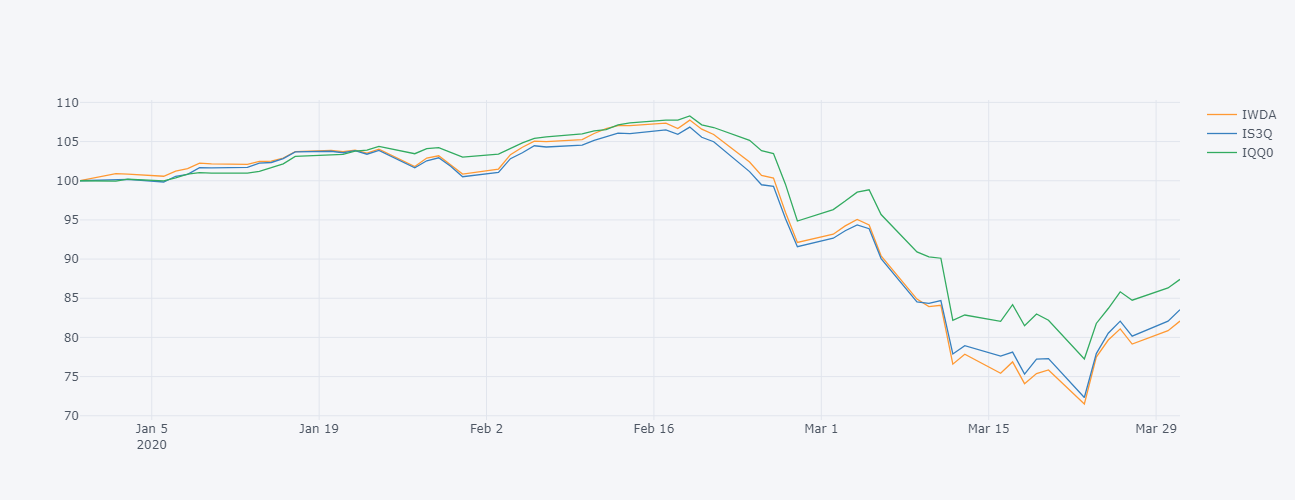

In [28]:
# Gráfico comparativo com start e stop (primeiro trimestre de 2020)
ETFs_2020Q1 = read_csv_investing(tickers=['IWDA', 'IS3Q', 'IQQ0'], start='2019-12-30', stop='2020-03-31')
ETFs_2020Q1.iplot(dimensions=pa.dimensions)

Lembrem-se que esta função só lê os ficheiros que existem na pasta e que são originários do investing.com. Não lê algo que não existe (naturalmente) e ficheiros de outra fonte deverão ter outro formato que os torna ilegíveis com este código feito propositadamente para os ficheiros do investing.com